<a href="https://colab.research.google.com/github/jana0601/AA_Summer-school-LMMS/blob/main/Lab_Session_ToyModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as scl

In this notebook, we will apply the basic EDMD algorithm to analyze data from the linear stochastic differential equation:
$$ \mathrm{d}X_t = -X_t \mathrm{d}t + \sigma(X_t) \mathrm{d}W_t $$

### Simulation and Evolution of Densities
Let us first define a numerical integrator (i.e. the machinery to produce data), and then have a look at the evolution of probability distributions with time.

In [7]:
# This function realizes the standard Euler scheme
# for a linear stochastic differential equation:
def Euler_Scheme(x0, sigma, dt, m):
    # Prepare output:
    y = np.zeros(m)
    y[0] = x0
    # Initialize at x0:
    x = x0
    # Integrate:
    for kk in range(1, m):
        # Update:
        xn = x - dt * x + sigma * np.sqrt(dt)*np.random.randn()
        # Update current state:
        y[kk] = xn
        x = xn
    return y

First, use the above function to produce 1000 simulations, each comprising discrete 1000 steps, at integration time step 1e-2, starting at $x_0 = 2$. Produce a histogram of the data after [10, 20, 50, 100, 200, 500] steps.
Then, repeat the experiment, but draw the initial condition from a normal distribution with mean zero, and standard deviation 0.5.

In [16]:
# Settings:
m = 1000
dt = 1e-2
ntraj = 1000
sigma = 1.0
# Generate data:
X = np.zeros((ntraj, m+1))
for l in range(ntraj):
  x0 = np.random.randn(1)
  X[l,:] = Euler_Scheme(x0,sigma,dt,m+1)

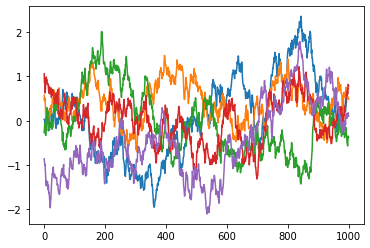

In [17]:
plt.plot(X[:5,:].T)

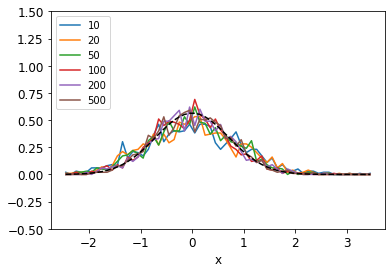

In [18]:
# Time instances to be used for histogramming:
t_vec = np.array([10, 20, 50, 100, 200, 500])
# Bins for histogram:
xe = np.arange(-2.5, 3.51, 0.1)
xc = 0.5 * (xe[1:] + xe[:-1])

# Histogram the data at different time instances:
plt.figure()

qq = 0
for t in t_vec:
  h, _ = np.histogram(X[:,t],bins=xe,density=True)
  plt.plot(xc,h,label="%d"%t_vec[qq])
  qq += 1



plt.plot(xc, (1.0/np.sqrt(2*np.pi *0.5))*np.exp(-xc**2), "k--")
plt.xlabel("x", fontsize=12)
plt.tick_params(labelsize=12)
plt.ylim([-.5, 1.5])
plt.legend(loc=2)

### Estimating the Koopman Operator

First, write a function to compute a matrix approximation for the Koopman operator. Inputs should the raw data, the time shifted raw data, a callable function to realize the basis set, and the number of basis functions:

In [ ]:
def koopman_matrix(X, Y, psi, n):
    # Get info on data:
    m = X.shape[0]
    # Evaluate basis set on full data:

    # Compute Koopman matrix:
    
    return K

Produce 10,000 pairs $(x_l, y_l)$ by drawing $x_l$ from the invariant measure of our linear SDE. Compute each $y_l$ by running the dynamics over time $t = 0.1$ (10 discrete time steps). Then, estimate the Koopman matrix for the monomial basis of degree 10.

In [ ]:
# Produce the data:
m = 10000
x = np.sqrt(0.5) * np.random.randn(m)
y = np.zeros(m)

# Define basis set:
n = 5

# Compute Koopman matrix:


### Koopman-based Prediction
Diagonalize the Koopman matrix. Use the spectral mapping theorem to predict the eigenvalues at times $[0.1, 0.2, 0.3, ..., 2.0]$. Compare to the analytical values: the $k$-th eigenvalue at lag time $t$ is given by $\exp(-k \cdot t)$.

In [ ]:
# Diagonalize K:
d, V = 
# Sort eigenvalues and eigenvectors:


# Plot eigenvalues at multiple lag times:
lags = nsteps * np.arange(1, 21)
plt.figure()
for k in range(1, 4):
    
    plt.plot(dt*lags, np.exp(- k * dt* lags), "x")

Use the Koopman matrix to predict the variance of the process at times $[0.1, 0.2, 0.3, ..., 2.0]$, if started at $x$, as a function of $x$. The variance is
$\mathbb{E}^x[(X_t)^2]$, which equals the Koopman operator applied to the function $x^2$. Remember this function is contained in your basis set.

In [ ]:
# Coefficient vector of x**2 with respect to monomial basis:
b = np.eye(n)[:, 2]
# Prepare output:
lag_coeffs = np.zeros((n, lags.shape[0]))
# Repeatedly apply Koopman matrix to coefficient vector:


# Plot coefficients of the variance as a function of t:
for ii in range(n):
    plt.plot(dt*lags, lag_coeffs[ii, :], "o--", label=r"$x^{%d}$"%ii)
plt.legend(loc=1)